In [1]:
from dprox import *
from dprox.utils import *
from dprox.utils.examples import *

## Validate

In [2]:
import dprox as dp
from dprox.utils.examples import fspecial_gaussian

x = dp.Variable()
psf = fspecial_gaussian(15, 5)
op = dp.conv(x, psf)
assert dp.validate(op)

Sanity check passed, diff=0.03125 rel_diff=6.125890195107786e-08


## Problem

In [3]:
img = sample()
psf = point_spread_function(15, 5)
b = blurring(img, psf)

x = Variable()
data_term = sum_squares(conv(x, psf) - b)
reg_term = deep_prior(x, denoiser='ffdnet_color')

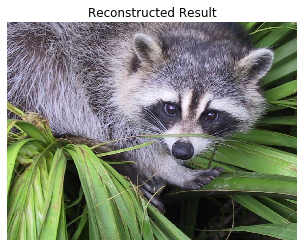

In [4]:
prob = Problem(data_term + reg_term)
out = prob.solve(method='admm', x0=b, device='cuda')
imshow(out, titles=['Reconstructed Result'], off_axis=True)

## Compile

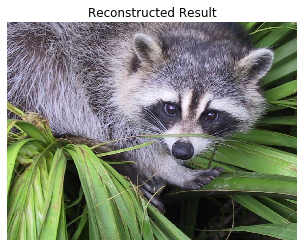

In [5]:
solver = compile(data_term+reg_term, method='admm', device='cuda')
out = solver.solve(x0=b)
imshow(out, titles=['Reconstructed Result'], off_axis=True)

## Specialize

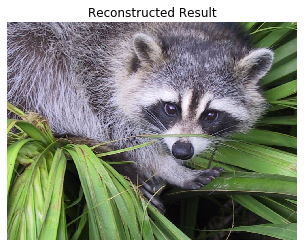

In [6]:
solver = specialize(solver, method='deq', device='cuda')
out = solver.solve(x0=b)
imshow(out, titles=['Reconstructed Result'], off_axis=True)